# **Lab 1 Perceptions and Linear Separability**
This lab is meant to demonstrate:
1. Implement a Rosenblatt perceptron from scratch in Python
2. Train a perceptron to learn the logical AND and OR operations
3. Visualise how the decision boundary adapts during training
4. Understand why a single-layer perceptron cannot learn XOR (linear separability)
5. Implement a two-layer perceptron to solve the XOR problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 12


## **Exercise 1 - Creating a Perceptron**

In [2]:
class Perceptron:
    #Initializing the Perceptron class - like a constructor
    def __init__(self, n_inputs, learning_rate=0.1):
        """
        Initialize the Perceptron.
        
        Parameters:
        n_inputs: Number of input features
        learning_rate: Learning rate for weight updates
        """
        #We set up the initial weights and bias randomly
        #Weights = the connections between inputs and the neuron - the values that get multiplied by the inputs
        #Bias = an additional parameter that allows us to shift the activation function
        #Learning rate = the learning rate
        self.bias = np.random.uniform(-0.5, 0.5)
        self.learning_rate = learning_rate
        self.weights = np.random.uniform(-0.5, 0.5, n_inputs)
    
    #Defining the step function
    #Step Function: this function is used to determine the output class based on the weighted sum of inputs
    #Think of it like a "yes/no" decision boundary or analogous to a light switch that turns on (1) or off (0) based on the input
    def step_function(self, x):
        return 1 if x >= 0 else 0
    
    #Predict Method
    #Make a prediction for given inputs
    def predict(self, inputs):
        """
        Make a prediction for given inputs.
        
        Parameters:
        inputs: Input features
        
        Returns:
        Predicted class (0 or 1)
        """
        #We add up the weighted inputs and bias, then apply the step function to get the output
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.step_function(weighted_sum)

    #Train Method
    #Meant to train the perceptron using the perceptron learning rule
    def train(self, X, y, epochs, verbose=True):
        """
        Train the perceptron using the perceptron learning rule.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
        Training inputs
        y : array-like, shape (n_samples,)
        Target outputs (0 or 1)
        epochs : int
        Number of training epochs
        verbose : bool
        If True, print weights after each epoch

        Returns:
        --------
        list : History of (weights, bias) tuples for each epoch
        """
        history = []

        # Store initial weights
        history.append((self.weights.copy(), self.bias))

        #We cycle through the epochs to train the perceptron
        #Epochs = complete passes through the training dataset
        for epoch in range(epochs):
            total_error = 0

            for i in range(len(X)):
                # Get prediction
                prediction = self.predict(X[i])

                # Calculate error
                error = y[i] - prediction
                total_error += abs(error)

                # Update weights and bias
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

            #Store weights after this epoch
            history.append((self.weights.copy(), self.bias))

            if verbose:
                print(f"Epoch {epoch + 1}: weights = {self.weights},bias = {self.bias:.4f}, errors = {total_error}")

            # Early stopping if no errors
            if total_error == 0:
                if verbose:
                    print(f"Converged after {epoch + 1} epochs!")
                break

        return history

## **Exercise 2 - Train Perceptron for Logical AND**

### Defining the Training Data

In [3]:
#Define training data for AND
X_and = np.array([
 [0, 0],
 [0, 1],
 [1, 0],
 [1, 1]
])
y_and = np.array([0, 0, 0, 1])
print("AND Training Data:")
print("X:")
print(X_and)
print("y:", y_and)

AND Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 0 0 1]


### Training & Testing the Perceptron

In [4]:
#Create perceptron
perceptron_and = Perceptron(n_inputs=2, learning_rate=0.1)

print("Initial weights:", perceptron_and.weights)
print("Initial bias:", perceptron_and.bias)
print("\nTraining...\n")

#Train (store the history for later visualisation)
history_and = perceptron_and.train(X_and, y_and, epochs=10)

#Test on all inputs
print("\nTesting AND perceptron:")
print("-" * 40)
all_correct = True
for i in range(len(X_and)):
   prediction = perceptron_and.predict(X_and[i])
   correct = "✓" if prediction == y_and[i] else "✗"
   if prediction != y_and[i]:
      all_correct = False
   print(f"Input: {X_and[i]} -> Predicted: {prediction}, Expected: {y_and[i]} {correct}")
   
print("-" * 40)
print(f"All predictions correct: {all_correct}")

Initial weights: [0.45071431 0.23199394]
Initial bias: -0.1254598811526375

Training...

Epoch 1: weights = [0.35071431 0.13199394],bias = -0.3255, errors = 2
Epoch 2: weights = [0.35071431 0.23199394],bias = -0.3255, errors = 2
Epoch 3: weights = [0.25071431 0.23199394],bias = -0.4255, errors = 1
Epoch 4: weights = [0.25071431 0.23199394],bias = -0.4255, errors = 0
Converged after 4 epochs!

Testing AND perceptron:
----------------------------------------
Input: [0 0] -> Predicted: 0, Expected: 0 ✓
Input: [0 1] -> Predicted: 0, Expected: 0 ✓
Input: [1 0] -> Predicted: 0, Expected: 0 ✓
Input: [1 1] -> Predicted: 1, Expected: 1 ✓
----------------------------------------
All predictions correct: True


### **Creating a plotting function**

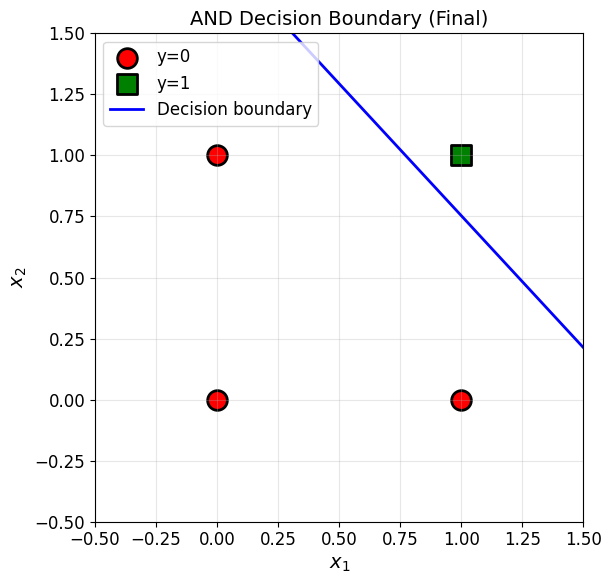

In [5]:
#Plotting function
def plot_decision_boundary(X, y, weights, bias, title="Decision Boundary", ax=None):
   """
   Plot data points and decision boundary.

    Parameters:
    -----------
    X : array-like, shape (n_samples, 2)
    Input data points
    y : array-like, shape (n_samples,)
    Labels (0 or 1)
    weights : array-like, shape (2,)
    Perceptron weights [w1, w2]
    bias : float
    Perceptron bias
    title : str
    Plot title
    ax : matplotlib axis (optional)
    Axis to plot on. If None, creates new figure.
    """
   if ax is None:
     fig, ax = plt.subplots(figsize=(8, 6))

    # Plot points
   for i in range(len(X)):
      if y[i] == 0:
        ax.scatter(X[i, 0], X[i, 1], c='red', marker='o', s=200, edgecolors='black', linewidths=2, label='y=0' if i == 0 else '')
   else:
    ax.scatter(X[i, 0], X[i, 1], c='green', marker='s', s=200, edgecolors='black', linewidths=2, label='y=1' if i == 3 else '')

    #FORMATTING

    # Plot decision boundary
    # Line: w1*x1 + w2*x2 + b = 0
    # => x2 = -(w1/w2)*x1 - b/w2

    x1_range = np.linspace(-0.5, 1.5, 100)

    if abs(weights[1]) > 1e-10: # Avoid division by zero
        x2_boundary = -(weights[0] / weights[1]) * x1_range - (bias / weights[1])
        ax.plot(x1_range, x2_boundary, 'b-', linewidth=2, label='Decision boundary')
    else:
    # Vertical line case
        if abs(weights[0]) > 1e-10:
            x1_boundary = -bias / weights[0]
            ax.axvline(x=x1_boundary, color='b', linewidth=2, label='Decision boundary')

    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel('$x_1$', fontsize=14)
    ax.set_ylabel('$x_2$', fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left')
    ax.set_aspect('equal')

    return ax
   
# Test the plotting function with the trained AND perceptron
plot_decision_boundary(X_and, y_and, perceptron_and.weights, perceptron_and.bias,"AND Decision Boundary (Final)")
plt.tight_layout()
plt.show()

### Animating the Learning Process

<Figure size 800x600 with 0 Axes>

AND - Decision Boundary Evolution:


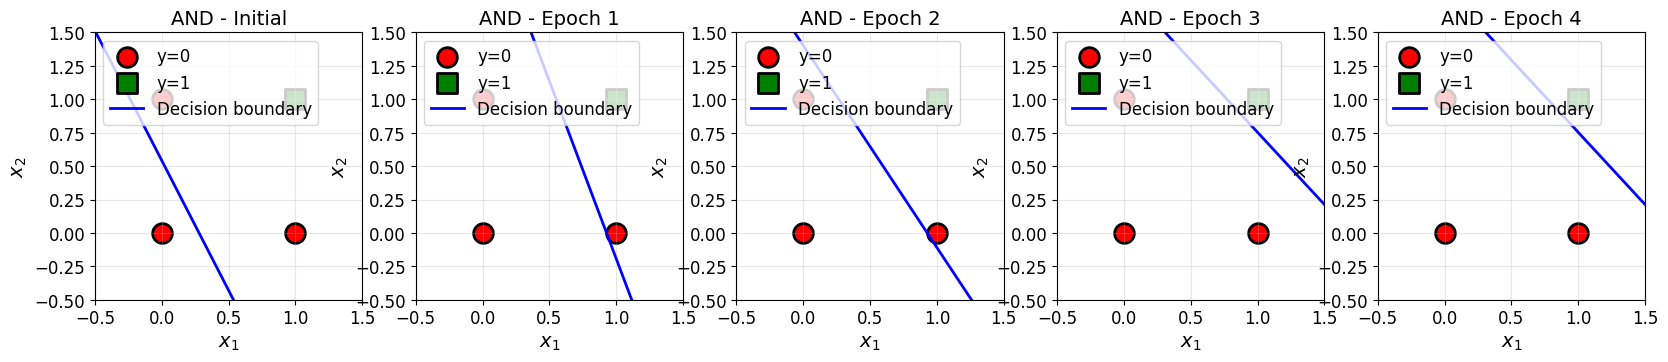

In [6]:
#Visualise decision boundary evolution across epochs
def plot_training_evolution(X, y, history, title_prefix=""):
    """
    Plot decision boundary evolution across training epochs.
    """
    n_epochs = len(history)

    # Determine grid size
    n_cols = min(5, n_epochs)
    n_rows = (n_epochs + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))

    # Handle single row case
    if n_rows == 1:
        axes = axes.reshape(1, -1)

    for idx, (weights, bias) in enumerate(history):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col]

        epoch_label = "Initial" if idx == 0 else f"Epoch {idx}"
        plot_decision_boundary(X, y, weights, bias, f"{title_prefix}{epoch_label}", ax=ax)

    # Hide empty subplots
    for idx in range(n_epochs, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()
# Plot AND training evolution
print("AND - Decision Boundary Evolution:")
plot_training_evolution(X_and, y_and, history_and, "AND - ")

### Displaying Weight Updates Table

In [7]:
import pandas as pd

def create_weight_table(history):
    """
    Create a pandas DataFrame showing weights at each epoch.
    """
    data = {
    'Epoch': [],
    'w₁': [],
    'w₂': [],
    'bias': []
    }

    for epoch, (weights, bias) in enumerate(history):
        data['Epoch'].append('Initial' if epoch == 0 else epoch)
        data['w₁'].append(f"{weights[0]:.4f}")
        data['w₂'].append(f"{weights[1]:.4f}")
        data['bias'].append(f"{bias:.4f}")

    return pd.DataFrame(data)

#Printing the code for AND weight history table
print("AND - Weight History Table:")
df_and = create_weight_table(history_and)
display(df_and)

AND - Weight History Table:


,Epoch,w₁,w₂,bias
0,Initial,0.4507,0.2320,-0.1255
1,1,0.3507,0.1320,-0.3255
2,2,0.3507,0.2320,-0.3255
3,3,0.2507,0.2320,-0.4255
4,4,0.2507,0.2320,-0.4255


## **Exercise 3 - Train the Perceptron**

### Define Data, Train and Visualise

In [8]:
#Defining Training data for OR
X_or = np.array([
 [0, 0],
 [0, 1],
 [1, 0],
 [1, 1]
])
y_or = np.array([0, 1, 1, 1])
print("OR Training Data:")
print("X:")
print(X_or)
print("y:", y_or)

OR Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 1 1 1]


In [9]:
#Training a new perceptron for OR
perceptron_or = Perceptron(n_inputs=2, learning_rate=0.1)

#Test on all inputs
print("Initial weights:", perceptron_or.weights)
print("Initial bias:", perceptron_or.bias)
print("\nTraining...\n")

# Train (store the history for later visualisation)
history_or = perceptron_or.train(X_or, y_or, epochs=10)
# Test on all inputs
print("\nTesting OR perceptron:")
print("-" * 40)
all_correct = True
for i in range(len(X_or)):
    prediction = perceptron_or.predict(X_or[i])
    correct = "✓" if prediction == y_or[i] else "✗"
    if prediction != y_or[i]:
        all_correct = False
    print(f"Input: {X_or[i]} -> Predicted: {prediction}, Expected: {y_or[i]} {correct}")

print("-" * 40)
print(f"All predictions correct: {all_correct}")

Initial weights: [-0.34398136 -0.34400548]
Initial bias: 0.0986584841970366

Training...

Epoch 1: weights = [-0.14398136 -0.14400548],bias = 0.2987, errors = 4
Epoch 2: weights = [-0.04398136 -0.04400548],bias = 0.2987, errors = 2
Epoch 3: weights = [-0.04398136 -0.04400548],bias = 0.1987, errors = 1
Epoch 4: weights = [-0.04398136 -0.04400548],bias = 0.0987, errors = 1
Epoch 5: weights = [-0.04398136  0.05599452],bias = 0.0987, errors = 2
Epoch 6: weights = [0.05601864 0.05599452],bias = 0.0987, errors = 2
Epoch 7: weights = [0.05601864 0.05599452],bias = -0.0013, errors = 1
Epoch 8: weights = [0.05601864 0.05599452],bias = -0.0013, errors = 0
Converged after 8 epochs!

Testing OR perceptron:
----------------------------------------
Input: [0 0] -> Predicted: 0, Expected: 0 ✓
Input: [0 1] -> Predicted: 1, Expected: 1 ✓
Input: [1 0] -> Predicted: 1, Expected: 1 ✓
Input: [1 1] -> Predicted: 1, Expected: 1 ✓
----------------------------------------
All predictions correct: True


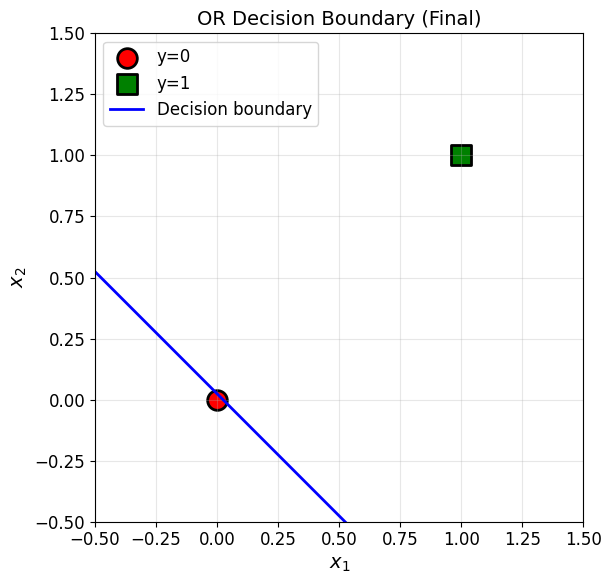

OR - Weight History Table:


,Epoch,w₁,w₂,bias
0,Initial,-0.3440,-0.3440,0.0987
1,1,-0.1440,-0.1440,0.2987
2,2,-0.0440,-0.0440,0.2987
3,3,-0.0440,-0.0440,0.1987
4,4,-0.0440,-0.0440,0.0987
5,5,-0.0440,0.0560,0.0987
6,6,0.0560,0.0560,0.0987
7,7,0.0560,0.0560,-0.0013
8,8,0.0560,0.0560,-0.0013


In [10]:
#Plotting the decision boundary for OR
plot_decision_boundary(X_or, y_or, perceptron_or.weights, perceptron_or.bias,"OR Decision Boundary (Final)")
plt.tight_layout()
plt.show()

# Visualise decision boundary evolution across epochs for OR
print("OR - Weight History Table:")
df_or = create_weight_table(history_or)
display(df_or)

### Comparing AND & OR Decision Boundaries

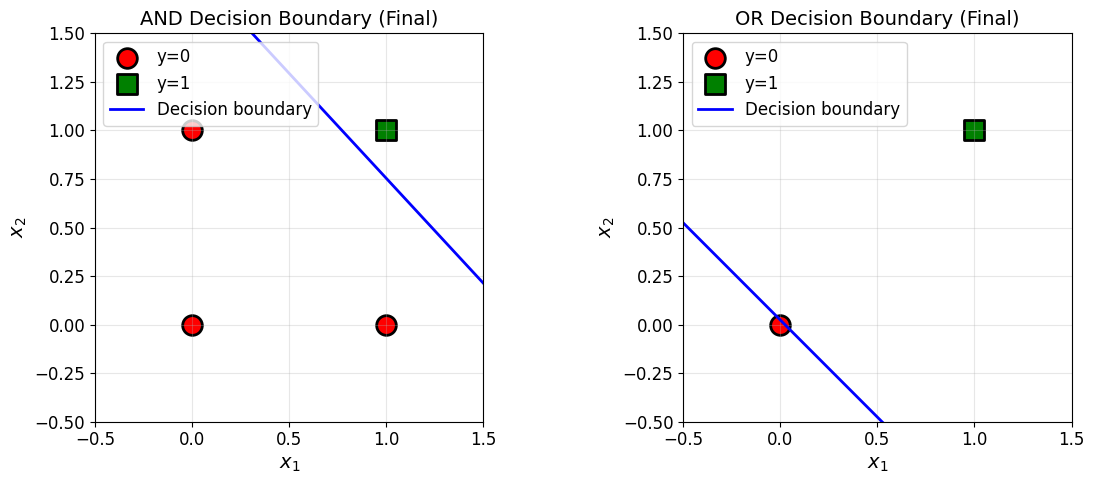

Discussion:
------------------------------------------------------------
AND: The decision boundary separates (1,1) from the other three points.
 The line passes 'above' most points, classifying only the top-right as 1.

OR: The decision boundary separates (0,0) from the other three points.
 The line passes 'below' most points, classifying only the origin as 0.

Both are solvable because in each case, the two classes can be separated
by a single straight line - they are LINEARLY SEPARABLE.


In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

#Plotting the decision boundary for AND
plot_decision_boundary(X_and, y_and, perceptron_and.weights, perceptron_and.bias,"AND Decision Boundary (Final)", ax=ax1)

#Plotting the decision boundary for OR
plot_decision_boundary(X_or, y_or, perceptron_or.weights, perceptron_or.bias,"OR Decision Boundary (Final)", ax=ax2)

#Finally show both plots
plt.tight_layout()
plt.show()
# Discussion
print("Discussion:")
print("-" * 60)
print("AND: The decision boundary separates (1,1) from the other three points.")
print(" The line passes 'above' most points, classifying only the top-right as 1.")
print()
print("OR: The decision boundary separates (0,0) from the other three points.")
print(" The line passes 'below' most points, classifying only the origin as 0.")
print()
print("Both are solvable because in each case, the two classes can be separated")
print("by a single straight line - they are LINEARLY SEPARABLE.")


## **Exercise 4 - The XOR Problem - Demonstrating the Linear inseparability problem**

In [12]:
#Setting up the XOR training data
X_xor = np.array([
 [0, 0],
 [0, 1],
 [1, 0],
 [1, 1]
])
y_xor = np.array([0, 1, 1, 0])
print("XOR Training Data:")
print("X:")
print(X_xor)
print("y:", y_xor)

XOR Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 1 1 0]


In [13]:
#Attempting to train a perceptron for XOR
perceptron_xor = Perceptron(n_inputs=2, learning_rate=0.1)

#Testing - with verbose off to reduce output clutter
print("Initial weights:", perceptron_xor.weights)
print("Initial bias:", perceptron_xor.bias)
print("\nAttempting to Train using XOR\n")
print("(Using 100 epochs to demonstrate non-convergence)\n")
history_xor = perceptron_xor.train(X_xor, y_xor, epochs=100, verbose=False)

print("\nTraining completed after 100 epochs.")
print(f"Final weights: {perceptron_xor.weights}")
print(f"Final bias: {perceptron_xor.bias:.4f}")

Initial weights: [0.36617615 0.10111501]
Initial bias: -0.44191638783180054

Attempting to Train using XOR

(Using 100 epochs to demonstrate non-convergence)


Training completed after 100 epochs.
Final weights: [-0.13382385  0.00111501]
Final bias: 0.0581


In [14]:
#Testing the XOR perceptron - showing that it fails to learn correctly
print("\nTesting XOR perceptron (single layer): ")
print("-" * 40)
false_predictions = 0
total_predictions = len(X_xor)
all_correct = True
for i in range(len(X_xor)):
    prediction = perceptron_xor.predict(X_xor[i])
    correct = "✓" if prediction == y_xor[i] else "✗"
    if prediction != y_xor[i]:
        false_predictions += 1
        all_correct = False
    print(f"Input: {X_xor[i]} -> Predicted: {prediction}, Expected: {y_xor[i]} {correct}")

print("-" * 40)
print(f"Total incorrect predictions: {false_predictions} out of {total_predictions}" + " Accuracy: {:.2f}%".format((total_predictions - false_predictions) / total_predictions * 100))

print("⚠️ The perceptron CANNOT learn XOR with a single layer!")


Testing XOR perceptron (single layer): 
----------------------------------------
Input: [0 0] -> Predicted: 1, Expected: 0 ✗
Input: [0 1] -> Predicted: 1, Expected: 1 ✓
Input: [1 0] -> Predicted: 0, Expected: 1 ✗
Input: [1 1] -> Predicted: 0, Expected: 0 ✓
----------------------------------------
Total incorrect predictions: 2 out of 4 Accuracy: 50.00%
⚠️ The perceptron CANNOT learn XOR with a single layer!


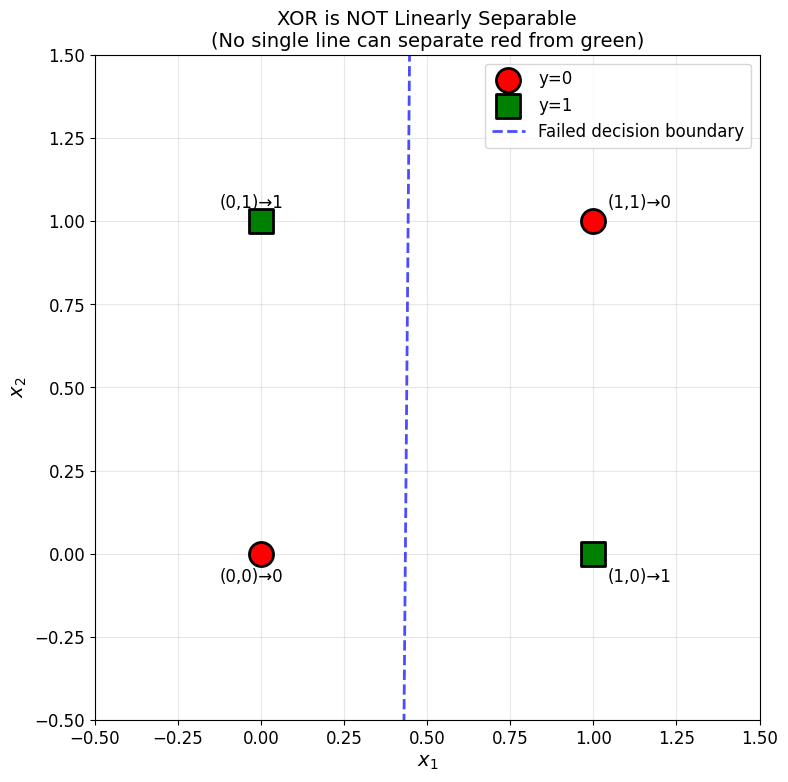

In [15]:
#Visualising the decision boundary for XOR
# Visualise XOR data points and failed decision boundary
fig, ax = plt.subplots(figsize=(8, 8))
# Plot points
for i in range(len(X_xor)):
    if y_xor[i] == 0:
        ax.scatter(X_xor[i, 0], X_xor[i, 1], c='red', marker='o', s=300,
        edgecolors='black', linewidths=2, zorder=5,
        label='y=0' if i == 0 else '')
    else:
        ax.scatter(X_xor[i, 0], X_xor[i, 1], c='green', marker='s', s=300,
        edgecolors='black', linewidths=2, zorder=5,
        label='y=1' if i == 1 else '')
# Add labels to points
ax.annotate('(0,0)→0', (0, 0), textcoords="offset points", xytext=(-30, -20), fontsize=12)
ax.annotate('(0,1)→1', (0, 1), textcoords="offset points", xytext=(-30, 10), fontsize=12)
ax.annotate('(1,0)→1', (1, 0), textcoords="offset points", xytext=(10, -20), fontsize=12)
ax.annotate('(1,1)→0', (1, 1), textcoords="offset points", xytext=(10, 10), fontsize=12)
# Plot the failed decision boundary
x1_range = np.linspace(-0.5, 1.5, 100)
if abs(perceptron_xor.weights[1]) > 1e-10:
    x2_boundary = -(perceptron_xor.weights[0] / perceptron_xor.weights[1]) * x1_range \
    - (perceptron_xor.bias / perceptron_xor.weights[1])
    ax.plot(x1_range, x2_boundary, 'b--', linewidth=2, alpha=0.7,
    label='Failed decision boundary')
# Formatting
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_title('XOR is NOT Linearly Separable\n(No single line can separate red from green)',fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.set_aspect('equal')
plt.tight_layout()
plt.show()


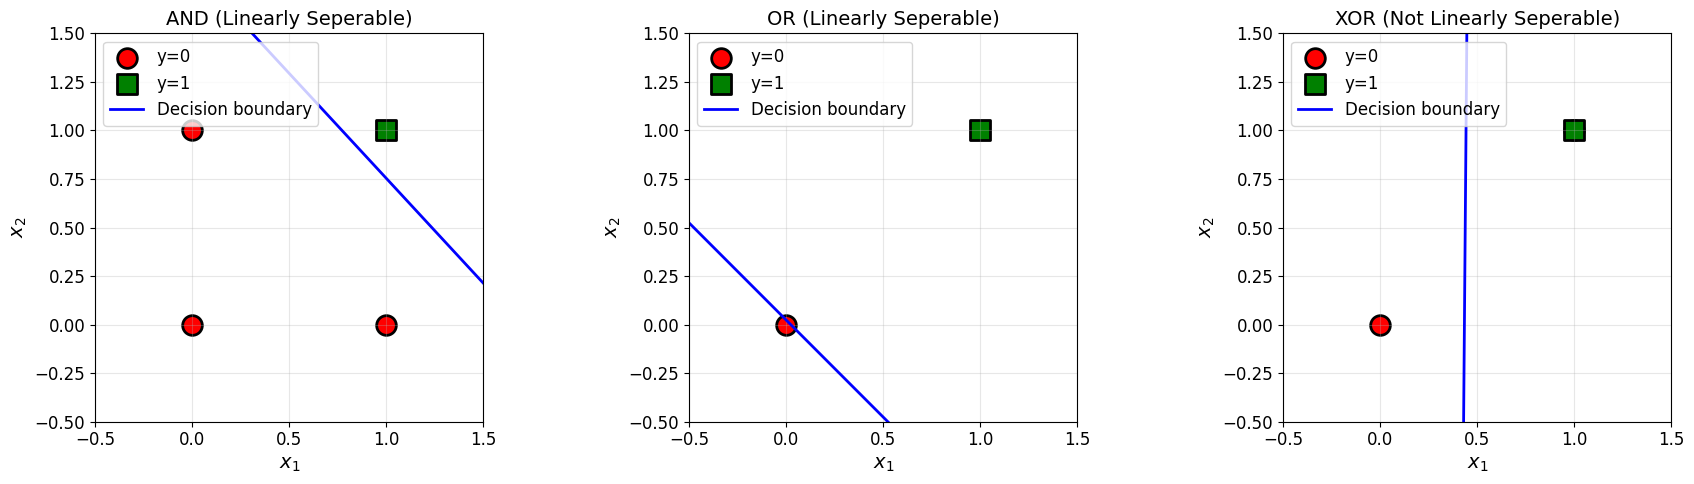

Figure saved as 'linear_separability_comparison.png'


In [16]:
# Create 3-panel comparison figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
# TODO: add code to plot the AND decision boundary (i.e. a method call)
plot_decision_boundary(X_and, y_and, perceptron_and.weights, perceptron_and.bias,"AND (Linearly Seperable)", ax=ax1)
# TODO: add code to plot the OR decision boundary (i.e. a method call)
plot_decision_boundary(X_or, y_or, perceptron_or.weights, perceptron_or.bias,"OR (Linearly Seperable)", ax=ax2)
# TODO: add code to plot the XOR decision boundary (i.e. a method call)
plot_decision_boundary(X_xor, y_xor, perceptron_xor.weights, perceptron_xor.bias,"XOR (Not Linearly Seperable)", ax=ax3)
plt.tight_layout()
plt.savefig('linear_separability_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved as 'linear_separability_comparison.png'")


## **Exercise 5 - Two Layer Perceptron for XOR**

To solve XOR, we need a **two-layer perceptron** (also called a multi-layer perceptron or MLP).
### The Architecture
The XOR function can be expressed as:

**XOR(x1, x2) = AND(OR(x1, x2), NAND(x1, x2))**

Or equivalently, we can use two hyperplanes in the hidden layer:
1. Perceptron 1 (hidden): Implements one linear boundary
2. Perceptron 2 (hidden): Implements another linear boundary
3. Perceptron 3 (output): Combines the outputs (AND-like operation)

### Implement with Pre Defined Tags

In [17]:
#To solve the XOR problem, a multi-layer perceptron (MLP) is required.
# Two-layer perceptron with pre-defined weights
def xor_two_layer_manual(x1, x2, verbose=False):
    """
    Compute XOR using a two-layer perceptron with pre-defined weights.

    Architecture based on lecture slides (slide 45):
    - Hidden neuron 1: fires when at most one input is 1 (-x1 - x2 + 1.5 >= 0)
    - Hidden neuron 2: fires when at least one input is 1 (x1 + x2 >= 0.5)
    - Output neuron: h1 AND h2 (both hidden neurons must fire)

    Parameters:
    -----------
    x1, x2 : int
    Input values (0 or 1)
    verbose : bool
    If True, print intermediate calculations

    Returns:
    --------
    int : XOR result (0 or 1)
    """
    # Step function
    step = lambda x: 1 if x >= 0 else 0

    # Hidden layer (from slides)
    # Perceptron 1: w1=-1, w2=-1, b=+1.5 (fires when at most one input is 1)
    h1_sum = x1 * (-1) + x2 * (-1) + 1.5
    h1 = step(h1_sum)

    # Perceptron 2: w1=+1, w2=+1, b=-0.5 (fires when at least one input is 1)
    # TODO: add code here to compute Perceptron 2
    h2_sum = x1 * (1) + x2 * (1) - 0.5
    h2 = step(h2_sum)

    # Output layer
    # Perceptron 3: w1=+1, w2=+1, b=-1.5 (fires when h1 AND h2)
    # TODO: add code here to compute Perceptron 3
    y_sum = h1 * (1) + h2 * (1) - 1.5
    y = step(y_sum)

    if verbose:
        print(f" Input: ({x1}, {x2})")
        print(f" Hidden 1: {x1}*(-1) + {x2}*(-1) + 1.5 = {h1_sum:.1f} -> h1 = {h1}")
        print(f" Hidden 2: {x1}*1 + {x2}*1 - 0.5 = {h2_sum:.1f} -> h2 = {h2}")
        print(f" Output: {h1}*1 + {h2}*1 - 1.5 = {y_sum:.1f} -> y = {y}")

    return y
# Test
print("Testing two-layer perceptron for XOR (manual weights):")
print("=" * 60)
all_correct = True
for x1 in [0, 1]:
    for x2 in [0, 1]:
        result = xor_two_layer_manual(x1, x2, verbose=True)
        expected = x1 ^ x2
        correct = "✓" if result == expected else "✗"
        if result != expected:
            all_correct = False
        print(f" Result: XOR({x1}, {x2}) = {result}, Expected: {expected} {correct}")
        print()
print("=" * 60)
print(f"All predictions correct: {all_correct}")

Testing two-layer perceptron for XOR (manual weights):
 Input: (0, 0)
 Hidden 1: 0*(-1) + 0*(-1) + 1.5 = 1.5 -> h1 = 1
 Hidden 2: 0*1 + 0*1 - 0.5 = -0.5 -> h2 = 0
 Output: 1*1 + 0*1 - 1.5 = -0.5 -> y = 0
 Result: XOR(0, 0) = 0, Expected: 0 ✓

 Input: (0, 1)
 Hidden 1: 0*(-1) + 1*(-1) + 1.5 = 0.5 -> h1 = 1
 Hidden 2: 0*1 + 1*1 - 0.5 = 0.5 -> h2 = 1
 Output: 1*1 + 1*1 - 1.5 = 0.5 -> y = 1
 Result: XOR(0, 1) = 1, Expected: 1 ✓

 Input: (1, 0)
 Hidden 1: 1*(-1) + 0*(-1) + 1.5 = 0.5 -> h1 = 1
 Hidden 2: 1*1 + 0*1 - 0.5 = 0.5 -> h2 = 1
 Output: 1*1 + 1*1 - 1.5 = 0.5 -> y = 1
 Result: XOR(1, 0) = 1, Expected: 1 ✓

 Input: (1, 1)
 Hidden 1: 1*(-1) + 1*(-1) + 1.5 = -0.5 -> h1 = 0
 Hidden 2: 1*1 + 1*1 - 0.5 = 1.5 -> h2 = 1
 Output: 0*1 + 1*1 - 1.5 = -0.5 -> y = 0
 Result: XOR(1, 1) = 0, Expected: 0 ✓

All predictions correct: True


### Visualising the 2 Hyperplanes

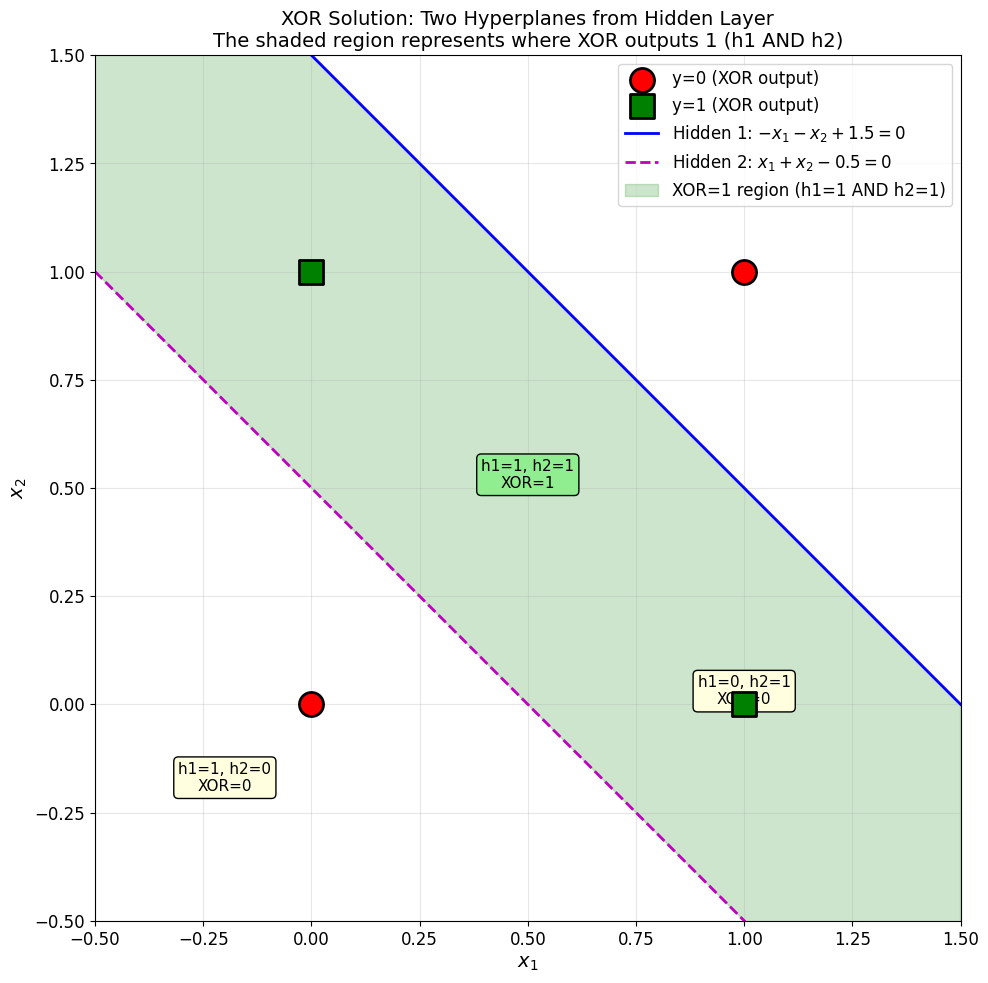

Figure saved as 'xor_two_hyperplanes.png'


In [18]:
# Visualise the two hyperplanes from the hidden layer
fig, ax = plt.subplots(figsize=(10, 10))
# Plot data points
for i in range(len(X_xor)):
    if y_xor[i] == 0:
        ax.scatter(X_xor[i, 0], X_xor[i, 1], c='red', marker='o', s=300,
        edgecolors='black', linewidths=2, zorder=5,
        label='y=0 (XOR output)' if i == 0 else '')
    else:
        ax.scatter(X_xor[i, 0], X_xor[i, 1], c='green', marker='s', s=300,
        edgecolors='black', linewidths=2, zorder=5,
        label='y=1 (XOR output)' if i == 1 else '')
# Define the two hyperplanes from hidden layer
x1_range = np.linspace(-0.5, 1.5, 100)
# Hidden neuron 1: -x1 - x2 + 1.5 = 0 => x2 = -x1 + 1.5
x2_h1 = -x1_range + 1.5
ax.plot(x1_range, x2_h1, 'b-', linewidth=2, label='Hidden 1: $-x_1 - x_2 + 1.5 = 0$')

# Hidden neuron 2: x1 + x2 - 0.5 = 0 => x2 = -x1 + 0.5
# TODO: add code here to compute x2 for this neuron
x2_h2 = -x1_range + 0.5
ax.plot(x1_range, x2_h2, 'm--', linewidth=2, label='Hidden 2: $x_1 + x_2 - 0.5 = 0$')
# Shade regions
# Region where XOR = 1 (between the two lines, where both h1=1 and h2=1)
ax.fill_between(x1_range, x2_h2, x2_h1, alpha=0.2, color='green',
 label='XOR=1 region (h1=1 AND h2=1)')
# Add annotations
ax.annotate('h1=1, h2=0\nXOR=0', xy=(-0.2, -0.2), fontsize=11, ha='center',
 bbox=dict(boxstyle='round', facecolor='lightyellow'))
ax.annotate('h1=1, h2=1\nXOR=1', xy=(0.5, 0.5), fontsize=11, ha='center',
 bbox=dict(boxstyle='round', facecolor='lightgreen'))
# TODO: Add code here to yellow-annotate the region where h1=0, h2=1, XOR=0
ax.annotate('h1=0, h2=1\nXOR=0', xy=(1.0, 0.0), fontsize=11, ha='center', bbox=dict(boxstyle='round', facecolor='lightyellow'))
# Formatting
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_title('XOR Solution: Two Hyperplanes from Hidden Layer\n'
 'The shaded region represents where XOR outputs 1 (h1 AND h2)', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.set_aspect('equal')
plt.tight_layout()
plt.savefig('xor_two_hyperplanes.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved as 'xor_two_hyperplanes.png'")

In [19]:
class TwoLayerPerceptron:
    """
    A two-layer perceptron (MLP) for XOR using sigmoid activation.
    This is a preview of Lab 2 concepts.
    """

    def __init__(self, input_size=2, hidden_size=2, output_size=1, learning_rate=0.5):
        """
        Initialise the network.
        """
        self.learning_rate = learning_rate

        # Weights: input -> hidden
        self.weights_ih = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.bias_h = np.random.uniform(-1, 1, hidden_size)

        # Weights: hidden -> output
        self.weights_ho = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias_o = np.random.uniform(-1, 1, output_size)

    def sigmoid(self, x):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def sigmoid_derivative(self, x):
        """Derivative of sigmoid: σ'(x) = σ(x)(1 - σ(x))."""
        s = self.sigmoid(x)
        return s * (1 - s)

    def forward(self, X):
        """
        Forward pass through the network.

        Returns intermediate values needed for backpropagation.
        """
        # Input to hidden
        self.z_h = np.dot(X, self.weights_ih) + self.bias_h
        self.a_h = self.sigmoid(self.z_h)

        # Hidden to output
        self.z_o = np.dot(self.a_h, self.weights_ho) + self.bias_o
        self.a_o = self.sigmoid(self.z_o)

        return self.a_o

    def backward(self, X, y):
        """
        Backward pass (backpropagation).
        """
        m = X.shape[0] # Number of samples

        # Output layer error
        output_error = y - self.a_o
        output_delta = output_error * self.sigmoid_derivative(self.z_o)

        # Hidden layer error
        hidden_error = np.dot(output_delta, self.weights_ho.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.z_h)

        # Update weights and biases
        self.weights_ho += self.learning_rate * np.dot(self.a_h.T, output_delta) / m
        self.bias_o += self.learning_rate * np.mean(output_delta, axis=0)

        self.weights_ih += self.learning_rate * np.dot(X.T, hidden_delta) / m
        self.bias_h += self.learning_rate * np.mean(hidden_delta, axis=0)

    def train(self, X, y, epochs, verbose_interval=1000):
        """
        Train the network.
        """
        losses = []

        for epoch in range(epochs):
        # Forward pass
            output = self.forward(X)

            # Compute loss (MSE)
            loss = np.mean((output - y.reshape(-1, 1)) ** 2)
            losses.append(loss)

            # Backward pass
            self.backward(X, y)

            if epoch % verbose_interval == 0:
                print(f"Epoch {epoch}: Loss = {loss:.6f}")

        return losses

    def predict(self, X):
        """
        Make predictions (rounded to 0 or 1).
        """
        output = self.forward(X)
        return (output >= 0.5).astype(int).flatten()

# Train the network
print("Training two-layer network for XOR (with backpropagation):")
print("=" * 60)

np.random.seed(42)
y_xor = y_xor.reshape(-1, 1) # Reshape targets to (n_samples, 1)
mlp = TwoLayerPerceptron(hidden_size=4, learning_rate=2.0)

losses = mlp.train(X_xor, y_xor, epochs=10001, verbose_interval=2000)

# Test
print("\nTesting trained network:")
print("-" * 40)
predictions = mlp.predict(X_xor)
for i in range(len(X_xor)):
    correct = "✓" if predictions[i] == y_xor[i] else "✗" 
    print(f"XOR({X_xor[i][0]}, {X_xor[i][1]}) = {predictions[i]}, Expected: {y_xor[i]} {correct}")

print("-" * 40)
accuracy = np.mean(predictions == y_xor.flatten()) * 100
print(f"Accuracy: {accuracy:.1f}%")

Training two-layer network for XOR (with backpropagation):
Epoch 0: Loss = 0.315398
Epoch 2000: Loss = 0.002133
Epoch 4000: Loss = 0.000789
Epoch 6000: Loss = 0.000475
Epoch 8000: Loss = 0.000338
Epoch 10000: Loss = 0.000262

Testing trained network:
----------------------------------------
XOR(0, 0) = 0, Expected: [0] ✓
XOR(0, 1) = 1, Expected: [1] ✓
XOR(1, 0) = 1, Expected: [1] ✓
XOR(1, 1) = 0, Expected: [0] ✓
----------------------------------------
Accuracy: 100.0%


### Plotting the training Loss

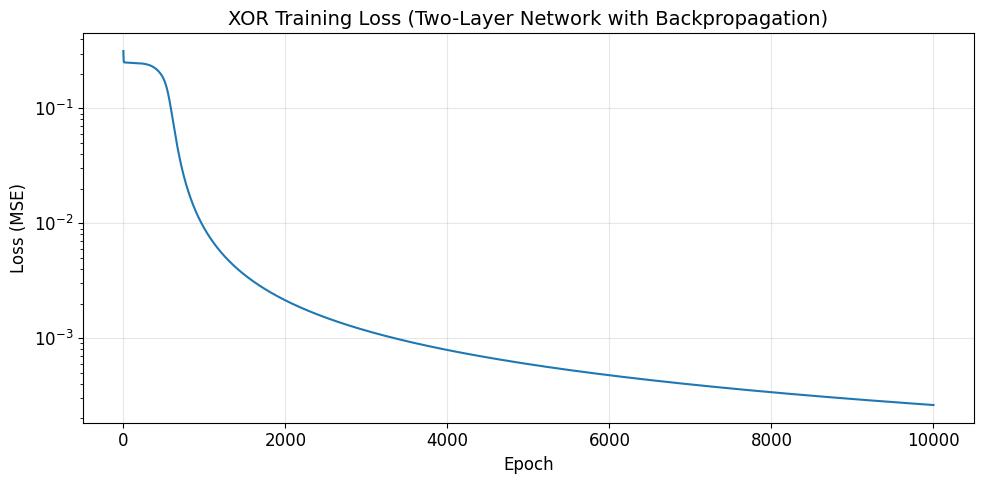

Figure saved as 'xor_training_loss.png'


In [20]:
# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('XOR Training Loss (Two-Layer Network with Backpropagation)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.tight_layout()
plt.savefig('xor_training_loss.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved as 'xor_training_loss.png'")


## **Exercise 6: NAND Operation**

In [21]:
#Setting up for the NAND Operation
X_nand = np.array([
 [0, 0],
 [0, 1],
 [1, 0],
 [1, 1]
])
y_nand = np.array([1, 1, 1, 0])
print("NAND Training Data:")
print("X:")
print(X_nand)
print("y:", y_nand)

NAND Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [1 1 1 0]


In [22]:
#Creating and training the perceptron for NAND
perceptron_nand = Perceptron(n_inputs=2, learning_rate=0.1)
print("Initial weights:", perceptron_nand.weights)
print("Initial bias:", perceptron_nand.bias)
print("\nTraining...\n")
#Train (store the history for later visualisation)
history_nand = perceptron_nand.train(X_nand, y_nand, epochs=10)
#Test on all inputs
print("\nTesting NAND perceptron:")
print("-" * 40)
all_correct = True
for i in range(len(X_nand)):
    prediction = perceptron_nand.predict(X_nand[i])
    correct = "✓" if prediction == y_nand[i] else "✗"
    if prediction != y_nand[i]:
        all_correct = False
    print(f"Input: {X_nand[i]} -> Predicted: {prediction}, Expected: {y_nand[i]} {correct}")
print("-" * 40)
print(f"All predictions correct: {all_correct}")

Initial weights: [-0.06805498 -0.20877086]
Initial bias: 0.02475643163223784

Training...

Epoch 1: weights = [-0.06805498 -0.10877086],bias = 0.1248, errors = 1
Epoch 2: weights = [-0.06805498 -0.10877086],bias = 0.1248, errors = 0
Converged after 2 epochs!

Testing NAND perceptron:
----------------------------------------
Input: [0 0] -> Predicted: 1, Expected: 1 ✓
Input: [0 1] -> Predicted: 1, Expected: 1 ✓
Input: [1 0] -> Predicted: 1, Expected: 1 ✓
Input: [1 1] -> Predicted: 0, Expected: 0 ✓
----------------------------------------
All predictions correct: True


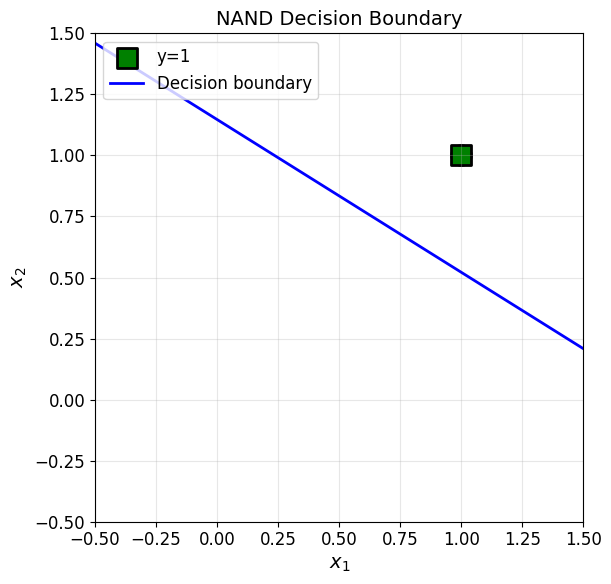

In [23]:
#Plotting the decision boundary for NAND
plot_decision_boundary(X_nand, y_nand, perceptron_nand.weights, perceptron_nand.bias,"NAND Decision Boundary")
plt.tight_layout()
plt.show()

## **Learning Rate Experiments**

LR=0.01: Converged in 16 epochs, Final weights: [0.30071431 0.19199394], bias: -0.3155
LR=0.1: Converged in 4 epochs, Final weights: [0.25071431 0.23199394], bias: -0.4255
LR=0.5: Converged in 5 epochs, Final weights: [0.95071431 0.23199394], bias: -1.1255
LR=1.0: Converged in 8 epochs, Final weights: [2.45071431 1.23199394], bias: -3.1255


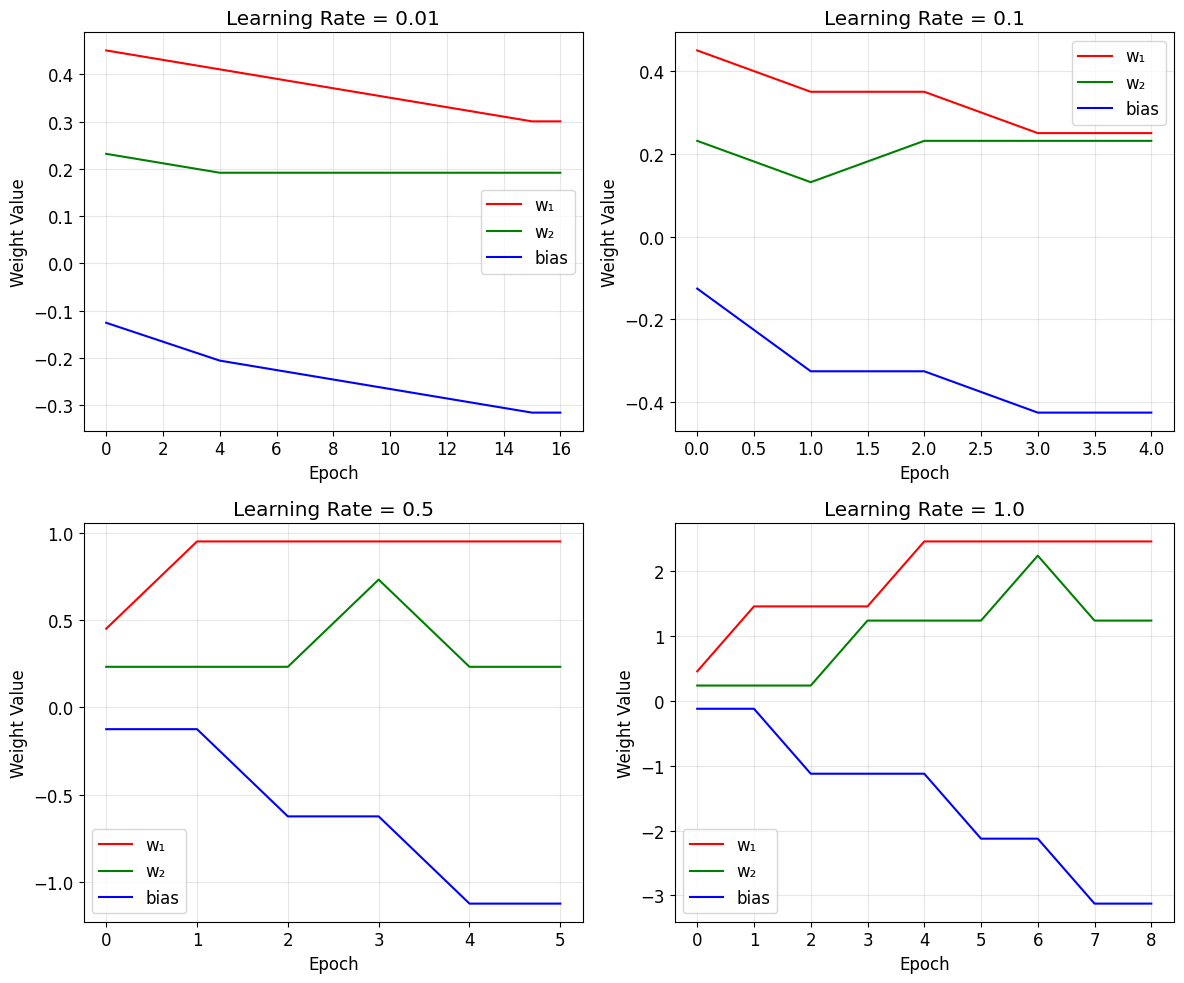

In [24]:
#Training the AND with different learning rates for comparison
learning_rates = [0.01, 0.1, 0.5, 1.0]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for idx, lr in enumerate(learning_rates):
    np.random.seed(42) # Same starting point
    # TODO: add code here to create Perceptron 'p' with learning rate 'lr'
    p = Perceptron(n_inputs=2, learning_rate=lr)

    # TODO: add code here to train the perceptron and record history
    ## Hint: set verbose to False
    history = p.train(X_and, y_and, epochs=50, verbose=False)


    ax = axes[idx // 2, idx % 2]

    # Plot weight evolution
    epochs = range(len(history))
    w1_vals = [h[0][0] for h in history]
    w2_vals = [h[0][1] for h in history]
    b_vals = [h[1] for h in history]

    ax.plot(epochs, w1_vals, 'r-', label='w₁')
    ax.plot(epochs, w2_vals, 'g-', label='w₂')
    ax.plot(epochs, b_vals, 'b-', label='bias')

    ax.set_xlabel('Epoch')
    ax.set_ylabel('Weight Value')
    ax.set_title(f'Learning Rate = {lr}')
    ax.legend()
    ax.grid(True, alpha=0.3)

    print(f"LR={lr}: Converged in {len(history)-1} epochs, Final weights: {p.weights}, bias: {p.bias:.4f}")
plt.tight_layout()
plt.savefig('learning_rate_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

## **Exercise 8 - 3 Input AND**

In [25]:
#Setting up the 3 -input AND training data
X_and3 = np.array([
 [0, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 1, 0],
 [1, 1, 1]
])
y_and3 = np.array([0, 0, 0, 0, 0, 0, 0, 1])
print("3-input AND Training Data:")
print("X:")
print(X_and3)
print("y:", y_and3)

3-input AND Training Data:
X:
[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
y: [0 0 0 0 0 0 0 1]


In [26]:
#Creating and training the perceptron for 3-input AND
perceptron_and3 = Perceptron(n_inputs=3, learning_rate=0.1)
print("Initial weights:", perceptron_and3.weights)
print("Initial bias:", perceptron_and3.bias)
print("\nTraining...\n")
#Train (store the history for later visualisation)
history_and3 = perceptron_and3.train(X_and3, y_and3, epochs=15)
#Test on all inputs
print("\nTesting 3-input AND perceptron:")
print("-" * 40)
all_correct = True
for i in range(len(X_and3)):
    prediction = perceptron_and3.predict(X_and3[i])
    correct = "✓" if prediction == y_and3[i] else "✗"
    if prediction != y_and3[i]:
        all_correct = False
    print(f"Input: {X_and3[i]} -> Predicted: {prediction}, Expected: {y_and3[i]} {correct}")
print("-" * 40)
print(f"All predictions correct: {all_correct}")

Initial weights: [-0.34398136 -0.34400548 -0.44191639]
Initial bias: 0.0986584841970366

Training...

Epoch 1: weights = [-0.24398136 -0.24400548 -0.34191639],bias = 0.0987, errors = 2
Epoch 2: weights = [-0.14398136 -0.14400548 -0.24191639],bias = 0.0987, errors = 2
Epoch 3: weights = [-0.04398136 -0.04400548 -0.14191639],bias = 0.0987, errors = 2
Epoch 4: weights = [ 0.05601864  0.05599452 -0.04191639],bias = 0.0987, errors = 2
Epoch 5: weights = [0.15601864 0.05599452 0.05808361],bias = -0.0013, errors = 3
Epoch 6: weights = [0.15601864 0.15599452 0.05808361],bias = -0.1013, errors = 3
Epoch 7: weights = [0.15601864 0.15599452 0.05808361],bias = -0.2013, errors = 3
Epoch 8: weights = [0.25601864 0.15599452 0.05808361],bias = -0.2013, errors = 2
Epoch 9: weights = [0.25601864 0.05599452 0.05808361],bias = -0.3013, errors = 3
Epoch 10: weights = [0.25601864 0.15599452 0.05808361],bias = -0.3013, errors = 2
Epoch 11: weights = [0.25601864 0.25599452 0.05808361],bias = -0.3013, errors =

## **Exercise 9 - Zoo Dataset Preview**
The Zoo dataset has 16 binary attributes per animal. Think about how a perceptron with 16 inputs would
work. What would the decision boundary look like in 16-dimensional space? (Answer: it's a 15-
dimensional hyperplane!)


In [27]:
print("Exercise 9: Zoo Dataset Preview")
print("=" * 60)
# The Zoo dataset has 101 animals with 16 binary attributes:
# hair, feathers, eggs, milk, airborne, aquatic, predator, toothed,
# backbone, breathes, venomous, fins, legs (0,2,4,5,6,8), tail, domestic, catsize
#
# Plus a class label (1-7): Mammal, Bird, Reptile, Fish, Amphibian, Bug, Invertebrate
# For this exercise, we'll create a simplified binary classification:
# Can a perceptron distinguish Mammals (class 1) from Non-Mammals?
# Sample data from Zoo dataset (simplified - using key attributes)
# Format: [hair, feathers, eggs, milk, airborne, aquatic, predator, toothed,
# backbone, breathes, venomous, fins, tail, domestic, catsize]
# Note: 'legs' omitted as it's not strictly binary
# Some mammals (class 1)
mammals = np.array([
    [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1], # aardvark
    [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1], # antelope
    [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1], # bear
    [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1], # cat
    [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1], # dog
    [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1], # elephant
    [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1], # deer
    [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1], # dolphin (no hair!)
])

# Some non-mammals
non_mammals = np.array([
    [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0], # chicken (bird)
    [0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0], # hawk (bird)
    [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0], # bass (fish)
    [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0], # carp (fish)
    [0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0], # frog (amphibian)
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], # honeybee (bug)
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0], # wasp (bug)
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], # scorpion (invertebrate)
])
# Combine into training data
X_zoo = np.vstack([mammals, non_mammals])
y_zoo = np.array([1]*len(mammals) + [0]*len(non_mammals)) # 1=mammal, 0=non-mammal

print(f"Dataset: {len(X_zoo)} animals, {X_zoo.shape[1]} features")
print(f"Mammals: {sum(y_zoo)}, Non-mammals: {len(y_zoo) - sum(y_zoo)}")
print()

#Train a perceptron
np.random.seed(42)

#Training a perceptron for Zoo dataset with 15 inputs and a learning rate of 0.1
perceptron_zoo = Perceptron(n_inputs=15, learning_rate=0.1)

print("Training perceptron for Mammal vs Non-Mammal classification...")
history_zoo = perceptron_zoo.train(X_zoo, y_zoo, epochs=50, verbose=False)
print(f"Training completed in {len(history_zoo)-1} epochs.")
print()

# Test
print("Testing:")
print("-" * 50)
animal_names = ['aardvark', 'antelope', 'bear', 'cat', 'dog', 'elephant', 'deer', 'dolphin',
 'chicken', 'hawk', 'bass', 'carp', 'frog', 'honeybee', 'wasp', 'scorpion']

n_correct = 0
for i in range(len(X_zoo)):
    pred = perceptron_zoo.predict(X_zoo[i])
    expected = y_zoo[i]
    correct = "✓" if pred == expected else "✗"
    if pred == expected:
        n_correct += 1
    label = "Mammal" if pred == 1 else "Non-mammal"
    print(f"{animal_names[i]:12} -> Predicted: {label:11} ({pred}),Expected: {expected} {correct}")

print("-" * 50)
print(f"Accuracy: {n_correct}/{len(X_zoo)} = {n_correct/len(X_zoo)*100:.1f}%")
print()
print("Key observations:")
print("1. With 15 inputs, the decision boundary is a 14-dimensional hyperplane!")
print("2. The 'milk' attribute (index 3) is very predictive of mammals.")
print("3. A single perceptron can only do binary classification (2 classes).")
print("4. For 7-class Zoo classification, we'd need a different approach (Lab 2).")

# Show which features have highest weights
feature_names = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize']

print("\nLearned weights (magnitude indicates importance):")
sorted_indices = np.argsort(np.abs(perceptron_zoo.weights))[::-1]

for idx in sorted_indices[:5]: # Top 5 features
    print(f" {feature_names[idx]:12}: {perceptron_zoo.weights[idx]:+.4f}")

Exercise 9: Zoo Dataset Preview
Dataset: 16 animals, 15 features
Mammals: 8, Non-mammals: 8

Training perceptron for Mammal vs Non-Mammal classification...
Training completed in 4 epochs.

Testing:
--------------------------------------------------
aardvark     -> Predicted: Mammal      (1),Expected: 1 ✓
antelope     -> Predicted: Mammal      (1),Expected: 1 ✓
bear         -> Predicted: Mammal      (1),Expected: 1 ✓
cat          -> Predicted: Mammal      (1),Expected: 1 ✓
dog          -> Predicted: Mammal      (1),Expected: 1 ✓
elephant     -> Predicted: Mammal      (1),Expected: 1 ✓
deer         -> Predicted: Mammal      (1),Expected: 1 ✓
dolphin      -> Predicted: Mammal      (1),Expected: 1 ✓
chicken      -> Predicted: Non-mammal  (0),Expected: 0 ✓
hawk         -> Predicted: Non-mammal  (0),Expected: 0 ✓
bass         -> Predicted: Non-mammal  (0),Expected: 0 ✓
carp         -> Predicted: Non-mammal  (0),Expected: 0 ✓
frog         -> Predicted: Non-mammal  (0),Expected: 0 ✓
honeybee  

## **Zoo DataSet Classification**

1. Load and explore the UCI Zoo dataset
2. Investigate which features make mammal classification "easy"
3. Use the two-layer network from Task 5.3 when key features are removed
4. Apply one-hot encoding for the "legs" feature

In [28]:
%pip install ucimlrepo
# Load Zoo dataset from UCI ML Repository
from ucimlrepo import fetch_ucirepo

zoo = fetch_ucirepo(id=111)

# Extract components
# - zoo.data.features: DataFrame with feature columns
# - zoo.data.targets: DataFrame with class labels
# - zoo.data.ids: DataFrame with animal names

# Get feature matrix and names
features_df = zoo.data.features
feature_names = features_df.columns.tolist()
features_raw = features_df.values

# Get target (class type: 1=Mammal, 2=Bird, 3=Reptile, 4=Fish,
# 5=Amphibian, 6=Bug, 7=Invertebrate)
class_labels = zoo.data.targets.values.flatten()

# Get animal names from the 'ids' DataFrame
animal_names = zoo.data.ids.iloc[:, 0].tolist()

# Binary target: Mammal (1) vs Non-Mammal (0)
y = (class_labels == 1).astype(int)

print(f"Dataset: {len(animal_names)} animals, {features_raw.shape[1]} features")
print(f"Mammals: {np.sum(y)}, Non-mammals: {np.sum(1-y)}")
print(f"\nFeature names: {feature_names}")
print(f"\nLegs values in dataset: {sorted(set(features_raw[:, feature_names.index('legs')]))}")

print(f"\nFirst 5 animals: {animal_names[:5]}")


Note: you may need to restart the kernel to use updated packages.
Dataset: 101 animals, 16 features
Mammals: 41, Non-mammals: 60

Feature names: ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']

Legs values in dataset: [np.int64(0), np.int64(2), np.int64(4), np.int64(5), np.int64(6), np.int64(8)]

First 5 animals: ['aardvark', 'antelope', 'bass', 'bear', 'boar']


### One Hot Encoding for Legs
The "legs" attribute takes categorical values: 0, 2, 4, 5, 6, 8.

**Why not normalise?** Normalising (e.g., legs/8) implies a meaningful ordering where 8 > 6 > 4, but
there's no biological reason why having more legs makes an animal more or less mammalian. A whale (0
legs) and a dog (4 legs) are both mammals.

**One-hot encoding** treats each leg count as an independent category:

In [29]:
# Get unique leg values from the dataset
legs_idx = feature_names.index('legs')
leg_categories = sorted(set(int(x) for x in features_raw[:, legs_idx]))
print(f"Leg categories found: {leg_categories}")
def encode_legs_onehot(legs_values, categories):
    """One-hot encoding for legs using the categories found in data."""
    encoded = np.zeros((len(legs_values), len(categories)))
    for i, legs in enumerate(legs_values):
        if int(legs) in categories:
            encoded[i, categories.index(int(legs))] = 1
    return encoded
def prepare_features(X_raw, feature_names, remove_features=None):
    """
    Prepare features: remove specified features, one-hot encode legs.
    """
    if remove_features is None:
        remove_features = []

    legs_idx = feature_names.index('legs')
    legs_values = X_raw[:, legs_idx]

    # Get indices to keep (exclude legs and any features to remove)
    remove_indices = [feature_names.index(f) for f in remove_features] + [legs_idx]
    keep_indices = [i for i in range(len(feature_names)) if i not in remove_indices]

    # Build feature matrix
    X_binary = X_raw[:, keep_indices].astype(float)
    X_legs = encode_legs_onehot(legs_values, leg_categories)
    X = np.hstack([X_binary, X_legs])

    # Build feature names
    kept_names = [feature_names[i] for i in keep_indices]
    legs_names = [f'legs_{c}' for c in leg_categories]
    new_feature_names = kept_names + legs_names

    return X, new_feature_names
# Prepare full feature set
X_full, feature_names_full = prepare_features(features_raw, feature_names)
print(f"\nFull feature set: {X_full.shape[1]} features")
print(f"Features: {feature_names_full}")

Leg categories found: [0, 2, 4, 5, 6, 8]

Full feature set: 21 features
Features: ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize', 'legs_0', 'legs_2', 'legs_4', 'legs_5', 'legs_6', 'legs_8']


### Train/Test Split

In [30]:
test_animals = ['dolphin', 'platypus', 'seal', 'penguin', 'frog', 'tortoise']
test_indices = [animal_names.index(name) for name in test_animals]
train_indices = [i for i in range(len(animal_names)) if i not in test_indices]
X_train_raw = features_raw[train_indices]
y_train = y[train_indices]
X_test_raw = features_raw[test_indices]
y_test = y[test_indices]
test_names = [animal_names[i] for i in test_indices]
print(f"Training set: {len(X_train_raw)} animals")
print(f"Test set: {len(X_test_raw)} animals")
print(f"\nTest animals and their true labels (1=mammal):")
for name, label in zip(test_names, y_test):
    print(f" {name:10}: {label}")

Training set: 95 animals
Test set: 6 animals

Test animals and their true labels (1=mammal):
 dolphin   : 1
 platypus  : 1
 seal      : 1
 penguin   : 0
 frog      : 0
 tortoise  : 0


### 10.4 - Experiment 1: All Features (Including Milk)

In [31]:
X_train_all, feat_names_all = prepare_features(X_train_raw, feature_names,remove_features=[])

X_test_all, _ = prepare_features(X_test_raw, feature_names, remove_features=[])

# Reshape targets for TwoLayerPerceptron
y_train_2d = y_train.reshape(-1, 1)

print("Experiment 1: All features (including milk)")
print("=" * 50)
print(f"Features ({len(feat_names_all)}): {feat_names_all}")

np.random.seed(42)
mlp_all = TwoLayerPerceptron(input_size=X_train_all.shape[1], hidden_size=16,learning_rate=0.5)
losses = mlp_all.train(X_train_all, y_train_2d, epochs=3000, verbose_interval=1000)

# Evaluate
train_pred = mlp_all.predict(X_train_all)
train_acc = np.mean(train_pred == y_train) * 100
test_pred = mlp_all.predict(X_test_all)
test_acc = np.mean(test_pred == y_test) * 100
print(f"\nTraining accuracy: {train_acc:.1f}%")
print(f"Test accuracy: {test_acc:.1f}%")
print("\nTest predictions:")

for name, pred, true in zip(test_names, test_pred, y_test):
    correct = '✓' if pred == true else '✗'
    print(f" {name:12s}: predicted={pred}, actual={true} {correct}")



Experiment 1: All features (including milk)
Features (21): ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize', 'legs_0', 'legs_2', 'legs_4', 'legs_5', 'legs_6', 'legs_8']
Epoch 0: Loss = 0.304658
Epoch 1000: Loss = 0.002239
Epoch 2000: Loss = 0.000949

Training accuracy: 100.0%
Test accuracy: 100.0%

Test predictions:
 dolphin     : predicted=1, actual=1 ✓
 platypus    : predicted=1, actual=1 ✓
 seal        : predicted=1, actual=1 ✓
 penguin     : predicted=0, actual=0 ✓
 frog        : predicted=0, actual=0 ✓
 tortoise    : predicted=0, actual=0 ✓


### 10.5 - Experiment 2: Remove "Milk"

In [32]:
X_train_no_milk, feat_names_no_milk = prepare_features(X_train_raw, feature_names,
 remove_features=['milk'])
X_test_no_milk, _ = prepare_features(X_test_raw, feature_names, remove_features=['milk'])

print("Experiment 2: Without 'milk'")
print("=" * 50)
print(f"Features ({len(feat_names_no_milk)}): {feat_names_no_milk}")

np.random.seed(42)
mlp_no_milk = TwoLayerPerceptron(input_size=X_train_no_milk.shape[1], hidden_size=16,
 learning_rate=0.5)
losses = mlp_no_milk.train(X_train_no_milk, y_train_2d, epochs=3000, verbose_interval=1000)

# Evaluate
train_pred = mlp_no_milk.predict(X_train_no_milk)
train_acc = np.mean(train_pred == y_train) * 100
test_pred = mlp_no_milk.predict(X_test_no_milk)
test_acc = np.mean(test_pred == y_test) * 100

print(f"\nTraining accuracy: {train_acc:.1f}%")
print(f"Test accuracy: {test_acc:.1f}%")
print("\nTest predictions:")

for name, pred, true in zip(test_names, test_pred, y_test):
    correct = '✓' if pred == true else '✗'
    print(f" {name:12s}: predicted={pred}, actual={true} {correct}")


Experiment 2: Without 'milk'
Features (20): ['hair', 'feathers', 'eggs', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize', 'legs_0', 'legs_2', 'legs_4', 'legs_5', 'legs_6', 'legs_8']
Epoch 0: Loss = 0.216758


Epoch 1000: Loss = 0.008392
Epoch 2000: Loss = 0.002289

Training accuracy: 100.0%
Test accuracy: 83.3%

Test predictions:
 dolphin     : predicted=1, actual=1 ✓
 platypus    : predicted=0, actual=1 ✗
 seal        : predicted=1, actual=1 ✓
 penguin     : predicted=0, actual=0 ✓
 frog        : predicted=0, actual=0 ✓
 tortoise    : predicted=0, actual=0 ✓


### 10.6 - Experiment 3: Remove "Hair", "Milks" and "Eggs"

In [33]:
X_train_reduced, feat_names_reduced = prepare_features(X_train_raw, feature_names,
 remove_features=['milk', 'hair', 'eggs'])
X_test_reduced, _ = prepare_features(X_test_raw, feature_names,
 remove_features=['milk', 'hair', 'eggs'])

print("Experiment 3: Without 'milk', 'hair', and 'eggs'")
print("=" * 50)
print(f"Features ({len(feat_names_reduced)}): {feat_names_reduced}")

np.random.seed(42)
mlp_reduced = TwoLayerPerceptron(input_size=X_train_reduced.shape[1], hidden_size=16,
 learning_rate=0.5)
losses = mlp_reduced.train(X_train_reduced, y_train_2d, epochs=5000, verbose_interval=1000)

# Evaluate
train_pred = mlp_reduced.predict(X_train_reduced)
train_acc = np.mean(train_pred == y_train) * 100
test_pred = mlp_reduced.predict(X_test_reduced)
test_acc = np.mean(test_pred == y_test) * 100

print(f"\nTraining accuracy: {train_acc:.1f}%")
print(f"Test accuracy: {test_acc:.1f}%")
print("\nTest predictions:")

for name, pred, true in zip(test_names, test_pred, y_test):
    correct = '✓' if pred == true else '✗'
    print(f" {name:12s}: predicted={pred}, actual={true} {correct}")


Experiment 3: Without 'milk', 'hair', and 'eggs'
Features (18): ['feathers', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize', 'legs_0', 'legs_2', 'legs_4', 'legs_5', 'legs_6', 'legs_8']
Epoch 0: Loss = 0.249187
Epoch 1000: Loss = 0.020826
Epoch 2000: Loss = 0.014094
Epoch 3000: Loss = 0.011222
Epoch 4000: Loss = 0.009820

Training accuracy: 98.9%
Test accuracy: 50.0%

Test predictions:
 dolphin     : predicted=1, actual=1 ✓
 platypus    : predicted=0, actual=1 ✗
 seal        : predicted=0, actual=1 ✗
 penguin     : predicted=0, actual=0 ✓
 frog        : predicted=0, actual=0 ✓
 tortoise    : predicted=1, actual=0 ✗


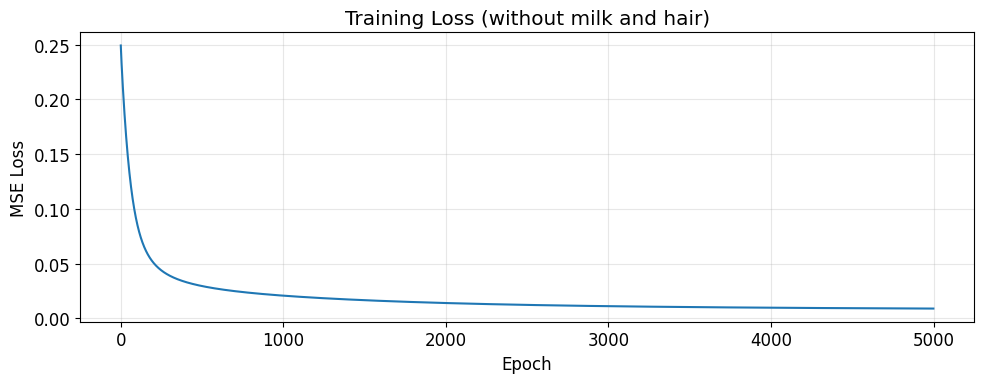

In [34]:
# Plot training loss
plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss (without milk and hair)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 10.7 - Analysis: The platypus Problem

In [35]:
platypus_idx = animal_names.index('platypus')
platypus_features = features_raw[platypus_idx]
print("Platypus features:")
print("=" * 40)
for name, val in zip(feature_names, platypus_features):
 marker = "← unusual for mammal!" if (name == 'eggs' and val == 1) else ""
 print(f" {name:12s}: {int(val)} {marker}")
print(f"\nClass: Mammal (class 1)")
print("\nThe platypus is a monotreme - a mammal that lays eggs!")
print("This makes it an outlier that confuses the classifier.")


Platypus features:
 hair        : 1 
 feathers    : 0 
 eggs        : 1 ← unusual for mammal!
 milk        : 1 
 airborne    : 0 
 aquatic     : 1 
 predator    : 1 
 toothed     : 0 
 backbone    : 1 
 breathes    : 1 
 venomous    : 0 
 fins        : 0 
 legs        : 4 
 tail        : 1 
 domestic    : 0 
 catsize     : 1 

Class: Mammal (class 1)

The platypus is a monotreme - a mammal that lays eggs!
This makes it an outlier that confuses the classifier.
